In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0] # These are the pixel values of the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

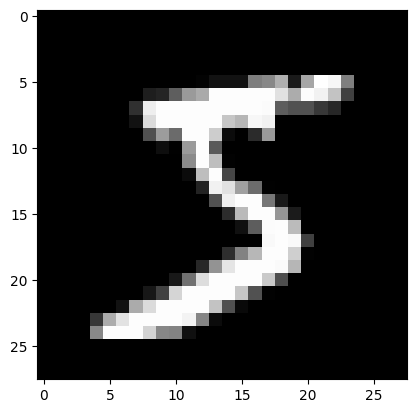

In [5]:
plt.imshow(x_train[0],cmap='gray') # This is how the first image looks like this is x train[0]

In [6]:
y_train[0] # this will give the label of the first image

5

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
import pandas as pd
pd.Series(y_train)#  This will give the labels of all the images in the training set

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8

In [9]:
pd.Series(y_train).unique() # This will give the unique labels in the training set

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [10]:
pd.Series(y_train).value_counts() # This will give the count of each label in the training set

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

Prepare your input data

In [11]:
x_train[0].shape # This will give the shape of the first image in the training set

(28, 28)

In [12]:
x_train[0].reshape(1,28*28) # This will reshape the first image in the training set to a 1D array of 784 elements

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

In [13]:
x_train_reshaped= x_train.reshape(60000,28*28) # This will reshape the entire training set to a 2D array of 60000 rows and 784 columns
x_test_reshaped= x_test.reshape(10000,28*28) # This will reshape the entire test set to a 2D array of 10000 rows and 784 columns

In [14]:
x_test.shape # This will give the shape of the test set

(10000, 28, 28)

In [15]:
x_test_reshaped.shape # This will give the shape of the reshaped test set

(10000, 784)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_train_scaled= scaler.fit_transform(x_train_reshaped) # This will scale the training set to a range of 0 to 1
x_test_scaled= scaler.transform(x_test_reshaped) # This will scale the test set to a range of 0 to 1

In [17]:
x_train_scaled[0] # This will give the scaled values of the first image in the training set

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
x_train_scaled # This will give the scaled values of the entire training set

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(units=128,activation='relu',name = "h1",input_shape=(784,)), 
    keras.layers.Dense(units=64,activation='relu',name = "h2"), # This will create a hidden layer with 64 neurons
    keras.layers.Dense(units=10,activation='softmax',name = "output") # This will create an output layer with 10 neurons (one for each class)
]) # This will create a sequential model with 3 layers

In [20]:
model.summary() # This will give the summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 128)               100480    
                                                                 
 h2 (Dense)                  (None, 64)                8256      
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(
    optimizer="adam", # This will use the Adam optimizer
    loss="sparse_categorical_crossentropy", # This will use sparse categorical crossentropy as the loss function
    metrics=["accuracy"] # This will use accuracy as the metric
    ) # This will compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric

In [22]:
model.fit(x_train_scaled, # This will train the model on the training set
y_train, # This will use the training labels
epochs=10, # This will train the model for 10 epochs
validation_data=(x_train_scaled,y_train), # This will use the training set for validation
) # This will train the model on the training set for 10 epochs with a batch size of 32

Epoch 1/10


1875/1875 [==============================] - 22s 10ms/step - loss: 0.2488 - accuracy: 0.9276 - val_loss: 0.1083 - val_accuracy: 0.9686
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1030 - accuracy: 0.9693 - val_loss: 0.0640 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0723 - accuracy: 0.9777 - val_loss: 0.0479 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0551 - accuracy: 0.9821 - val_loss: 0.0409 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0343 - val_accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0265 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0242 

In [23]:
x_train_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
x_train_scaled[0].shape # This will give the shape of the first image in the training set

(784,)

In [25]:
model.predict(x_train_scaled[0].reshape(1,784)) # This will predict the label of the first image in the training set

1/1 [==============================] - 0s 302ms/step


array([[7.9332080e-18, 1.7172762e-16, 2.0021923e-16, 1.1774416e-06,
        9.6108080e-31, 9.9999881e-01, 3.4590868e-21, 5.1535549e-20,
        1.2547138e-17, 2.0584747e-14]], dtype=float32)

In [26]:
np.argmax(model.predict(x_train_scaled[0].reshape(1,784))) # This will give the index of the maximum value in the predicted array, which is the predicted label of the first image in the training set

1/1 [==============================] - 0s 80ms/step


5

In [27]:
from sklearn.metrics import classification_report
y_train_pred= model.predict(x_train_scaled) # This will predict the labels of the entire training set
y_test_pred= model.predict(x_test_scaled) # This will predict the labels of the entire test set
print(y_train_pred.shape) # This will give the shape of the predicted labels of the training set
print(y_test_pred.shape) # This will give the shape of the predicted labels of the test set

313/313 [==============================] - 2s 5ms/step
(60000, 10)
(10000, 10)


In [28]:
y_train_pred_final= np.argmax(y_train_pred,axis=1) # This will give the final predicted labels of the training set
y_test_pred_final= np.argmax(y_test_pred,axis=1) # This will give the final predicted labels of the test set
print(y_train_pred_final.shape) # This will give the shape of the final predicted labels of the training set
print(y_test_pred_final.shape) # This will give the shape of the final predicted labels of the test set

(60000,)
(10000,)


In [29]:
print("\n training_report\n")
print(classification_report(y_train,y_train_pred_final)) # This will give the classification report of the training set
print("\n test_report\n")
print(classification_report(y_test,y_test_pred_final)) # This will give the classification report of the test set


 training_report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      0.99      1.00      5958
           3       1.00      0.99      0.99      6131
           4       1.00      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       0.99      1.00      0.99      5851
           9       0.99      1.00      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


 test_report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98 

In [ ]:
import cv2
from PIL import Image 

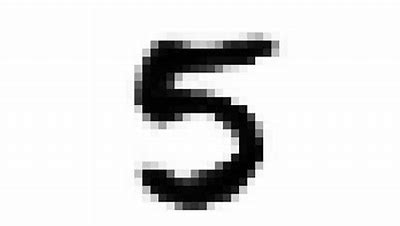

In [36]:
img=Image.open("OIP.jpeg").convert("L") # This will open the image and convert it to grayscale
img

In [37]:
np.array(img) # This will convert the image to a numpy array

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253]], dtype=uint8)

In [38]:
np.array(img).shape # This will give the shape of the image array

(226, 400)

In [39]:
img_resized=img.resize((28,28)) # This will resize the image to 28x28 pixels
np.array(img_resized).shape # This will give the shape of the resized image array

(28, 28)

In [41]:
image_reshaped= np.array(img_resized).reshape(1,784) # This will reshape the resized image to a 1D array of 784 elements
image_reshaped.shape # This will give the shape of the reshaped image array

(1, 784)

In [42]:
scaled_image=scaler.transform(image_reshaped) # This will scale the reshaped image to a range of 0 to 1

In [44]:
np.argmax(model.predict(scaled_image)) # This will predict the label of the scaled image

1/1 [==============================] - 0s 40ms/step


5